<a href="https://colab.research.google.com/github/abishaalichan/abishaalichan/blob/main/Sentiment_analysis_NLP_facebook_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud #used for visualization of text data showing the most frequent
                                #words or importance of words.
nltk.download('stopwords')
from nltk.corpus import stopwords
import re #re stands for Regular Expressions which is a sequence of characters that define a
          #search pattern, allowing us to perform string manipulation operations such as pattern
          #matching, search, substitution and parsing.
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer #Lemmatization is a process where words are reduced to their
                                        #base or canonical form, known as the lemma
from sklearn.feature_extraction.text import CountVectorizer #performs vectorization i.e,converts a
                                                            #collection of text documents into matrix
                                                            #of token counts
from sklearn.model_selection import train_test_split,GridSearchCV #GridSearch is a tool used for
                                                                  #hyper parameter tuning
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.metrics import classification_report,confusion_matrix
# import joblib #a tool for lightweight pipelining

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**LOAD AND PREPARE DATASET**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/facebook_reviews.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,06ceae33-49b7-4864-96f7-4edd5216a843,Jacob Millar,My Facebook market place judt vanished tried t...,1,0,450.0.0.42.110,2024-05-20 21:52:30,450.0.0.42.110
1,288253b6-2390-4061-8dc4-77d5dd340bf5,Ipotseng Hosia,Nice,5,0,464.0.0.60.90,2024-05-20 21:52:22,464.0.0.60.90
2,1e3776fd-7c1c-44bb-a56e-8cd4976933ab,yusif khan,yusif khan good Facebook,5,0,464.0.0.60.90,2024-05-20 21:50:08,464.0.0.60.90
3,9ba18175-f46f-4688-8f75-70ea75392c37,Agada Gabriel,happy birthday,5,0,NaN,2024-05-20 21:48:44,NaN
4,844ebeb2-2a35-47e4-9ee2-ebc64e589f6c,Opia Vera,the best so fa,5,0,464.0.0.60.90,2024-05-20 21:47:55,464.0.0.60.90
...,...,...,...,...,...,...,...,...
71321,d7816c49-b04a-4069-b9f9-25e63d069a41,Deepak thakur Deepak thakur,nice video,5,0,NaN,2024-05-08 00:07:55,NaN
71322,c23d2b31-4c97-41de-867c-3f5ef3a61d0d,Joseph Leblanc,love it!!!,5,0,462.0.0.47.85,2024-05-08 00:07:38,462.0.0.47.85
71323,01bdb728-5042-4a8f-b207-8a02263c7b3e,Christian Kelechi,Good work is confirmed,5,0,361.0.0.39.115,2024-05-08 00:07:31,361.0.0.39.115
71324,a5207278-bc25-4bbb-b999-004407519b81,Mankhush Abinash,I NH by t um TV ex RV hu by,1,0,462.0.0.47.85,2024-05-08 00:04:41,462.0.0.47.85


In [ ]:
df.dtypes

reviewId                object
userName                object
content                 object
score                    int64
thumbsUpCount            int64
reviewCreatedVersion    object
at                      object
appVersion              object
dtype: object

In [ ]:
df.describe()

,score,thumbsUpCount
count,71326.000000,71326.000000
mean,3.327651,83.002930
std,1.790722,1046.731796
min,1.000000,0.000000
25%,1.000000,0.000000
50%,4.000000,0.000000
75%,5.000000,0.000000
max,5.000000,110743.000000


In [ ]:
df.isna().sum()

reviewId                   0
userName                   2
content                   10
score                      0
thumbsUpCount              0
reviewCreatedVersion    8352
at                         0
appVersion              8352
dtype: int64

In [ ]:
df.shape

(71326, 8)

In [ ]:
df.duplicated().sum()

5896

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(65430, 8)

In [ ]:
df['thumbsUpCount'].value_counts()

thumbsUpCount
0        50037
1         3963
2         1467
3          968
4          673
         ...  
1544         1
4984         1
3103         1
22163        1
1228         1
Name: count, Length: 1785, dtype: int64

Analyzing score column

In [ ]:
df['score'].value_counts()

score
5    30213
1    21459
2     4955
4     4421
3     4382
Name: count, dtype: int64

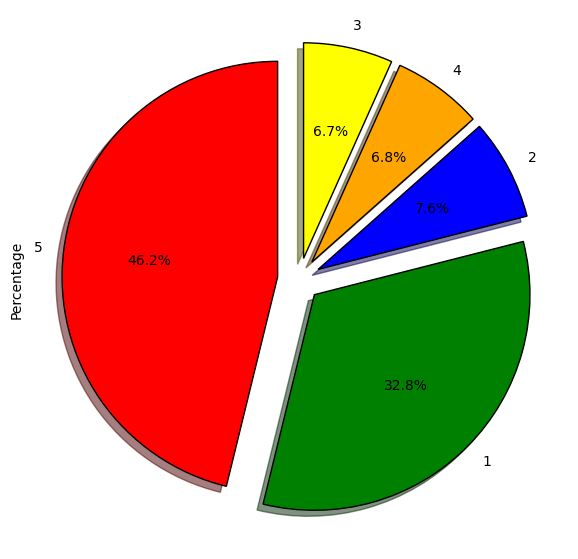

In [ ]:
fig=plt.figure(figsize=(7,7))  #creates a figure of 7x7 inches
colors=('red','green','blue','orange','yellow')
wp={'linewidth':1,'edgecolor':'black'} #wedgeprops
tags=df['score'].value_counts()/df.shape[0]  #counts the percentage of each unique score
explode=(0.1,0.1,0.1,0.1,0.1) #a tuple containing how much each slice of the pie chart should be offset from the center. Each slice is offset by
#10% of the radius.
tags.plot(kind='pie',autopct='%1.1f%%',shadow=True,colors=colors,startangle=90,wedgeprops=wp,explode=explode,label='Percentage')
#startangle - rotates the start of the angle by 90 degrees.
from io import BytesIO #importing a bytestream function
graph=BytesIO()
fig.savefig(graph,format='png')

In [ ]:
df['userName']=df['userName'].fillna(df['userName'].mode()[0])
df['content']=df['content'].fillna(df['content'].mode()[0])
df['reviewCreatedVersion']=df['reviewCreatedVersion'].fillna(df['reviewCreatedVersion'].mode()[0])
df['appVersion']=df['appVersion'].fillna(df['appVersion'].mode()[0])

In [ ]:
df.isna().sum()

reviewId                0
userName                0
content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    0
at                      0
appVersion              0
dtype: int64

In [ ]:
df.drop(['reviewId','userName','reviewCreatedVersion','at','appVersion'],axis=1,inplace=True)

**DATA PREPROCESSING** :
->Converting to lowercase
->Removing punctuation
->Stemming/Lemmatization
->Removing stopwords

In [ ]:
text=df['content']

In [ ]:
#tokenization
from nltk.tokenize import TweetTokenizer
tk=TweetTokenizer()
# text=text.apply(lambda x:tk.tokenize(x))
# text=text.apply(lambda x:' '.join(x))
text=text.apply(lambda x:' '.join([w for w in tk.tokenize(x) if len(w)>=3])) #to collect words greater than 3
text

0        Facebook market place judt vanished tried appe...
1                                                     Nice
2                                 yusif khan good Facebook
3                                           happy birthday
4                                                 the best
                               ...                        
67641    Account and personal information keeps getting...
67642    created Page Facebook Now can't Abe add action...
67713                                      ઝીણાભાઈ બાબરીયા
68032                                  little slice Heaven
68194     The recent changes has proved major disadvantage
Name: content, Length: 65430, dtype: object

In [ ]:
#removing unwanted characters
text=text.str.replace('[^a-zA-Z0-9]',' ',regex=True)

In [ ]:
#stemming - it is used to stem english words so that number of words decreases. By this, the timea
#and space complexity also reduces.
from nltk.stem import SnowballStemmer  #we also have PorterStemmer. The main difference between PorterStemmer
#and SnowballStemmer is that PorterStemmer is limited to english language only while SnowballStemmer can be
#multi-lingual
stemmer=SnowballStemmer('english') #english is given so that stemming happens using English rules.
text=text.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))

In [ ]:
from nltk.corpus import stopwords
sw=stopwords.words('english')
text=text.apply(lambda x:[i for i in tk.tokenize(x) if i not in sw]).apply(lambda x:' '.join(x))
text

0        facebook market place judt vanish tri appeal b...
1                                                     nice
2                                 yusif khan good facebook
3                                           happi birthday
4                                                     best
                               ...                        
67641    account person inform keep get hack app recomm...
67642    creat page facebook abe add action button app ...
67713                                                     
68032                                   littl slice heaven
68194                 recent chang prove major disadvantag
Name: content, Length: 65430, dtype: object

**VISUALIZING TEXT DATA**

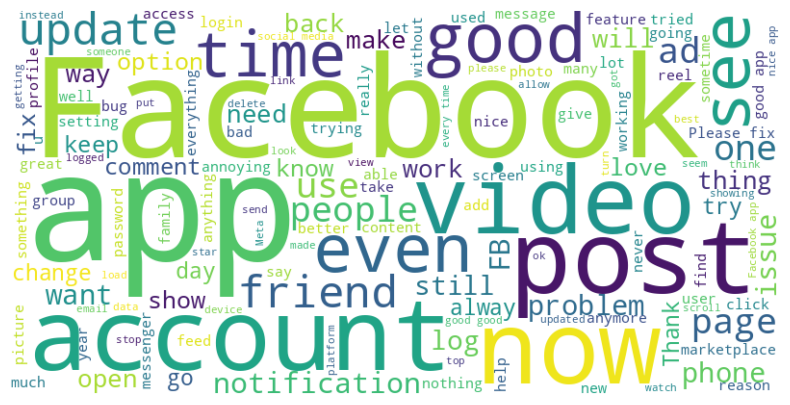

In [ ]:
wordcloud = WordCloud(width=800,height=400,background_color='white',min_font_size=10).generate(' '.join(df['content']))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear') #bilinear is used to display smoother image
plt.axis('off')
plt.show()

**FEATURE EXTRACTION**

In [ ]:
#vectorization - This is the method by which textual data is converted to numerical data.
#We do this because ultimately, we are feeding the model and the model does not understand
#categorical data. They need numerical data.
vectorizer=CountVectorizer()
x=vectorizer.fit_transform(df['content'])
y=df['score']

In [ ]:
x.shape

(65430, 35091)

**MODEL TRAINING AND EVALUATION**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
#normalization
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
#used when the data is sparse(mostly contains 0's or holds no significant value)
#maxabsscaler : first takes the absolute max value of each column
#then divides each value of that column with the abs max.
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
nb=MultinomialNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
precision=precision_score(y_test,y_pred,average='weighted')
print("Precision:",precision)
recall=recall_score(y_test,y_pred,average='weighted')
print("Recall:",recall)

Accuracy: 0.7034999235824545
Precision: 0.6038229063442189
Recall: 0.7034999235824545


In [ ]:

param_grid={'alpha':[0.00001, 0.0001, 0.001, 0.1, 1, 10, 100, 1000]}
grid_search=GridSearchCV(MultinomialNB(),param_grid,cv=5,scoring='accuracy')
grid_search.fit(x_train,y_train)
print("Best parameter:",grid_search.best_params_)
nb_classifier=grid_search.best_estimator_
y_pred2=nb_classifier.predict(x_test)

Best parameter: {'alpha': 1}


In [ ]:
y_pred2

array([1, 5, 5, ..., 1, 1, 1])

In [ ]:
accuracy=accuracy_score(y_test,y_pred2)
print("Accuracy:",accuracy)
precision=precision_score(y_test,y_pred2,average='weighted')
print("Precision:",precision)
recall=recall_score(y_test,y_pred2,average='weighted')
print("Recall:",recall)

Accuracy: 0.7034999235824545
Precision: 0.6038229063442189
Recall: 0.7034999235824545


In [ ]:
!pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.4 MB/s eta 0:00:00


In [ ]:
!wget -q -O - ipv4.icanhazip.com

35.196.98.101


In [ ]:
! streamlit run app1.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.196.98.101:8501

npx: installed 22 in 5.956s
your url is: https://fruity-cities-tell.loca.lt
2024-07-08 07:16:06.773 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 589, in _run_script
    exec(code, module.__dict__)
  File "/content/app1.py", line 68, in <module>
    vectorizer = joblib.load('vectorizer.joblib')
  File "/usr/local/lib/python3.10/dist-packages/joblib/numpy_pickle.py", line 658, in load
    obj = _unpickle(fobj, filename, mmap_mode)
  File "/usr/local/lib/python3.10/dist-packages/joblib/numpy_pickle.py", line 577, in _unpickle
    obj = unpickler.load()
  File "/usr/lib/python3.10/pickle.py", line 1213, in load
    dispatch[key[0]](self)
KeyError: 0
2024-07-08 07:27:16.523 Uncaught app exception
Traceba

In [ ]:
#joblib - It is a library used to load code to a file